# Метрики качества в задачах классификации

https://scikit-learn.org/stable/modules/model_evaluation.html

### Матрица ошибок (confusion matrix)

При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. Существуют различные метрики оценки качества предсказаний, которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative, соответствующих тому какой класс был присвоен наблюдениям каждого из классов. Матрицу этих параметров называют **confusion matrix**.\
В sklearn можно её удобно получить с помощью функции confusion_matrix.\
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов, тогда матрица ошибок классификации будет выглядеть следующим образом:
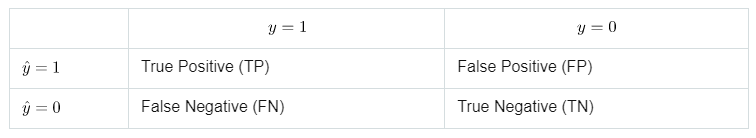

Если принять что "Класс 1" - это искомый целевой объект, то:\
FP - ошибка первого рода (ложная тревога)\
FN - ошибка второго рода (пропуск цели)

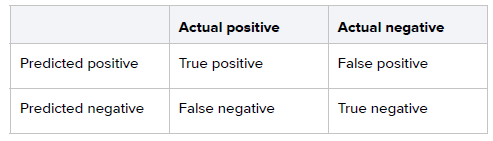

### Accuracy (доля правильных ответов алгоритма)
Отношение правильно классифицированных наблюдений ко всем.
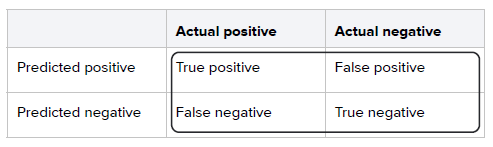

$$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

Высокий accuracy не всегда говорит о качестве модели. Например, она бесполезна в случае неравномерного распределения классов.

### Precision (точность) и Recall (полнота)

**Precision** можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными:
$$Precision = \frac{TP}{TP+FP}$$
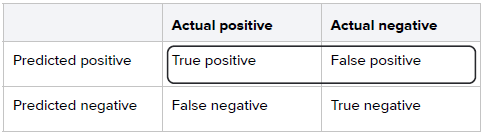

**Recall** показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм:
$$Recall = \frac{TP}{TP+FN}$$
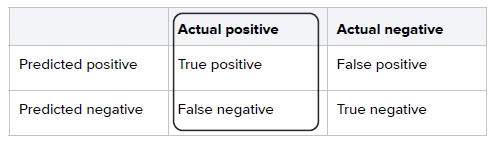

Синонимом Recall является **TPR** - True Positive Rate (sensitivity)

--------------------------------------------------------------------------


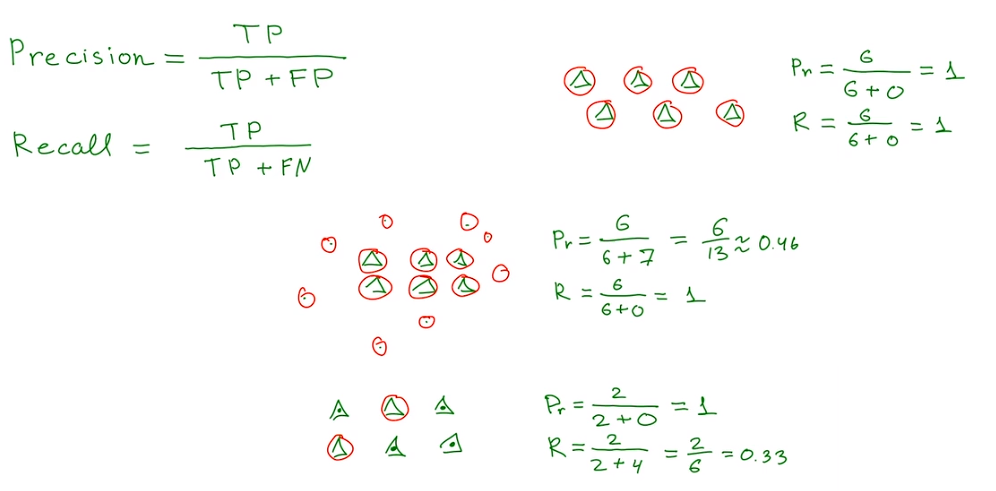

С одной стороны мы можем очень хорошо предсказать все цели, но при этом будет достаточно много ложных срабатываний (что называется "перебдеть"). С другой стороны, можно избежать ложных срабатываний, но также при этом упустить настоящие цели ("недобдеть").\
Эти две метрики показывают насколько модель хорошо справляется с этими двумя сторонами.

**Precision** - показывает насколько хорошо получается находить цели, не переплачивая при этом ложными срабатываниями. При этом она не показывает какой процент целей мы нашли. Мы можем найти всего одну цель из шести, но если при этом не будет ложных срабатываний, то Precision будет равен 1.

**Recall** дополняет метрику Precision. Он показывает все ли цели нам удалось найти. Но при этом сам по себе он не несет информации какую цену нам пришлось переплатить за это ложными срабатываниями.

Что же оптимизировать: Precision или Recall? Это зависит от конкретной задачи, от исходных условий.\
Нужно повышать Precision в ситуациях, когда нужно минимизировать ложные положительные срабатывания.\
Recall — важен там, где не нужны ложные отрицательные.

### Accuracy vs Precision vs Recall

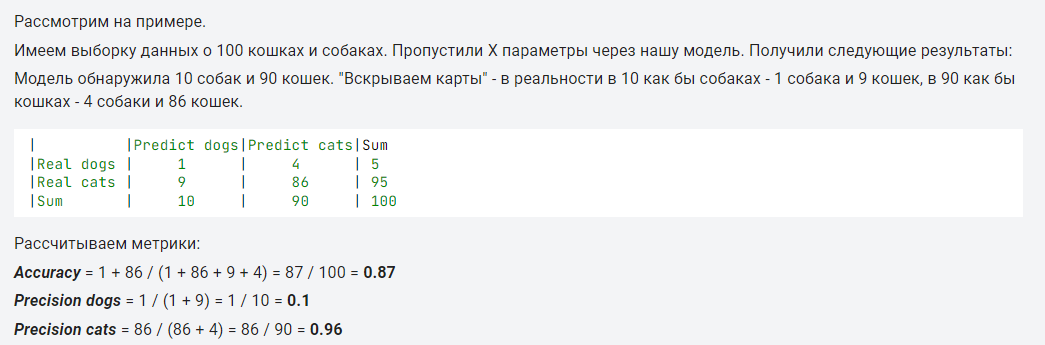

### F-мера (F1_score)
Это комбинированная мера Precision и Recall:
$$F = \frac{2*Precision*Recall}{Precision + Recall}$$

Если хотя бы одна из метрик будет равна нулю, то и в целом F-мера будет равна нулю.\
Чем больше будут обе меры, тем больше будет значение F-меры.\
Принимает значения от 0 до 1.

В sklearn есть удобная функция metrics.classification_report, возвращающая recall, precision и F-меру для каждого из классов, а также количество экземпляров каждого класса.

Есть и такой вариант F-меры: $F_{\beta}$
$$F_{\beta} = (1+\beta^2)\frac{Precision*Recall}{\beta^2*Precision + Recall}$$

Здесь параметр $\beta$ определяет вес Precision в метрике. При $\beta$=1 это гармоническое среднее, умноженное на 2 (чтобы в случае precision=1 и recal=1 F1=1)

Значение $\beta$ задается с учетом того, чему требуется отдать приоритет: precision или recal. \
Если важнее recal, то $\beta$>1 \
Если важнее precision, то $\beta$<1 


### False positive rate

**FPR** показывает долю неправильно предсказанных объектов среди всех объектов, относящихся к отрицательному классу:
$$FPR = \frac{FP}{FP+TN}$$
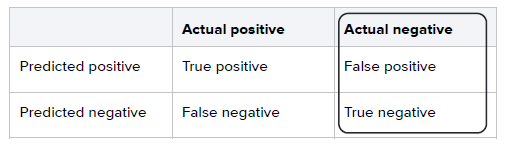

**Если в модели классификации присутствуют несколько классов, то ряд метрик (полнота, прецизионность, F1−score) вычисляются при фиксации одного класса как положительного, а остальных - как отрицательных.**

### Порог для выбора метки класса
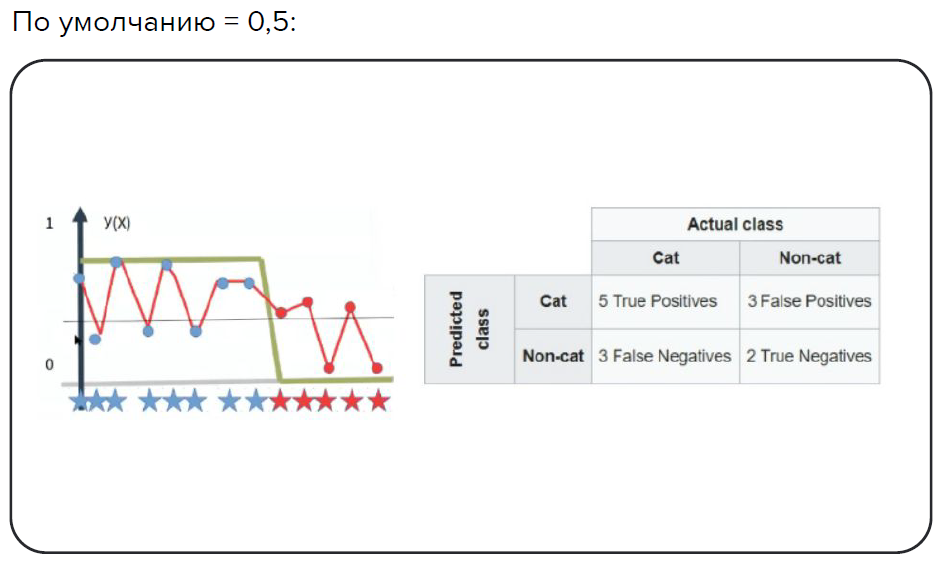
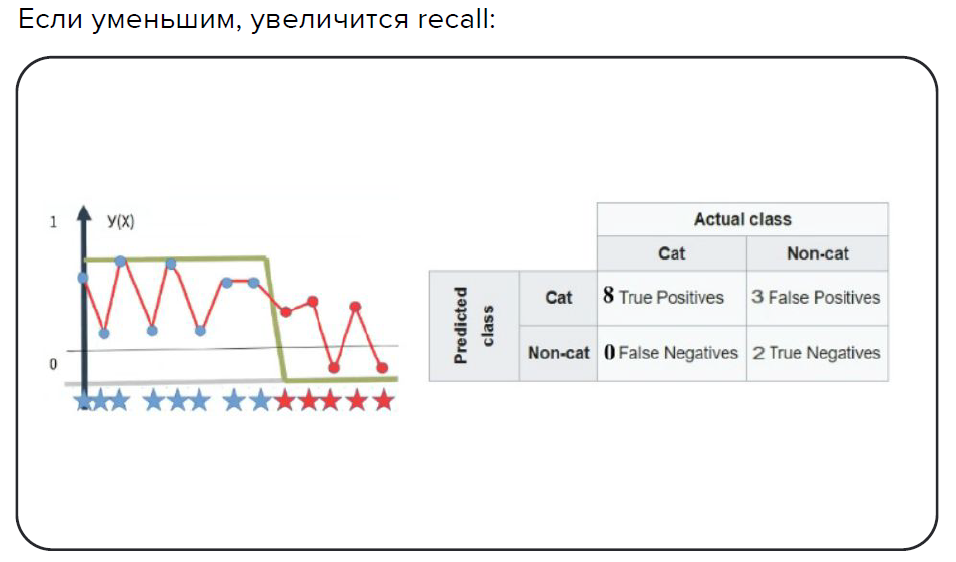
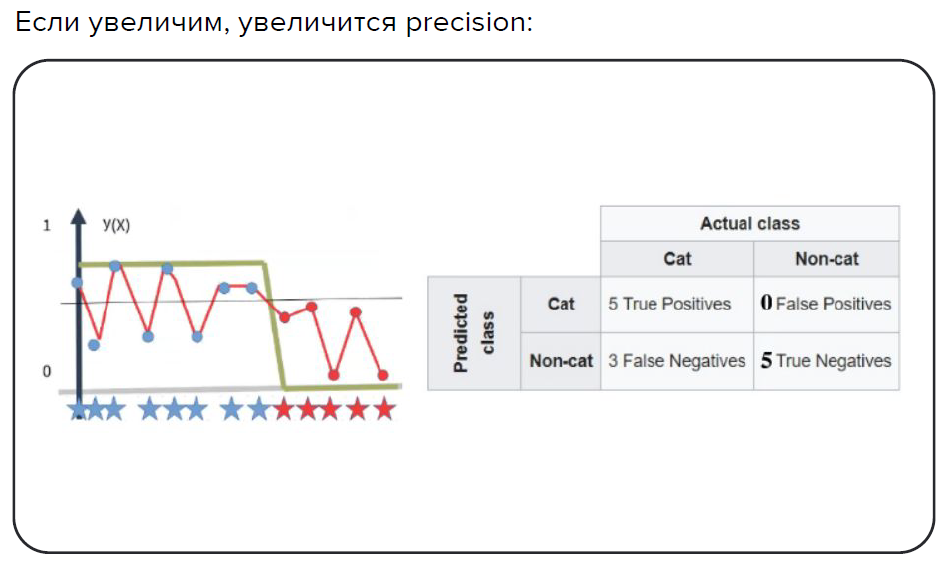

### AUC-ROC (или ROC-AUC)
Кривая ROC показывает взаимосвязь между показателем ложных положительных
результатов (FPR) и истинно положительным показателем (TPR) для разных
пороговых значений:
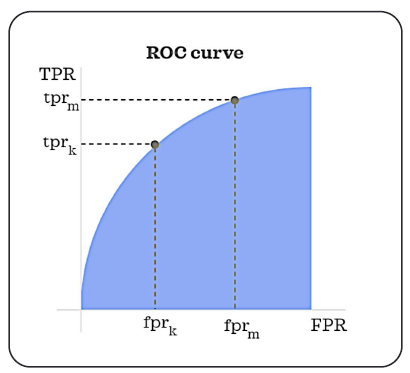

В идеальном случае ROC-кривая проходит через верхний левый угол, где доля TP составляет 100% или 1.0, а доля FP равна 0. Поэтому чем ближе кривая к верхнему левому углу, тем лучше модель. Чем кривая ближе к диагонали, тем хуже модель. Самый худший случай когда кривая = диагонали, то есть это "бесполезная" модель (полная неразличимость классов). Ниже диагонали кривая не может находиться.

### PR-AUC (precision recall area under the curve)
Кривая PR показывает взаимосвязь между показателем precision (точность)
и recall (полнота) для разных пороговых значений:
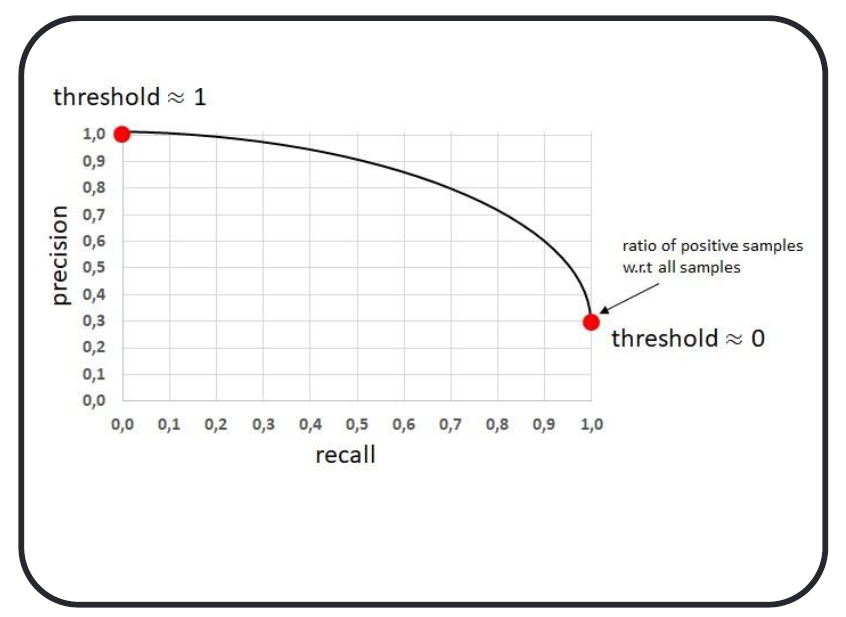
**Модель тем лучше, чем выше площадь под кривой**

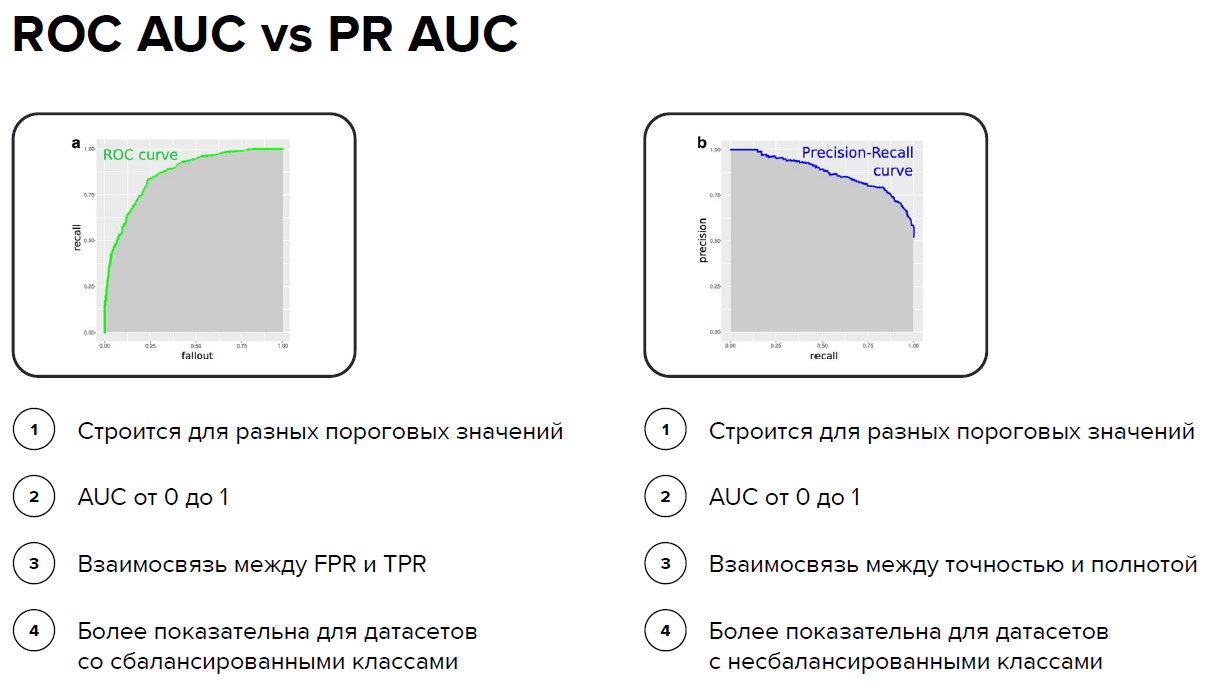

# Метрики качества в задачах регресии

### MAE, Mean Absolute Error (средняя абсолютная ошибка)

$$MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|$$



### MAPE, Mean Absolute Percent Error (средняя абсолютная ошибка в процентах)

$$MAPE = \frac{1}{n}\sum_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{|y_i|} * 100$$



### MSE, Mean Square Error (средняя квадратичная ошибка)
$$MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

### RMSE, Root Mean Square Error (квадратный корень средней квадратичной ошибки)
$$RMSE = \sqrt{MSE}$$

Идеальное значение для перечисленных выше метрик = 0

### $R^2$ Коэффициент детерминации
Это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью
$$R^2 = 1 - \frac{\sum{(y_i - \hat{y}_i})}{\sum{(y_i - {\bar{y}})}}$$

По сути $R^2 = 1 - \frac{MSE}{D}$, где D - дисперсия

Значение метрики как правило находится в пределах от 0 до 1. В идеале стремится к единице. Иногда бывает, что значение оказывается отрицательным.